In [1]:
from functions_for_all_nutrients import *
from vitamin_a_and_zinc_functions import *

In [2]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]
location_ids = [163,179,214]

# VITAMIN A

In [3]:
# vitamin A specific -- these should be replaced for other models
rei_id = 96
nutrient = 'vitamin a'
vehicle = 'oil'
effective_fractions = [0, 0, (365 - (365 * 0.5)) / (365 - 28), 1]

In [4]:
# define no fortification relative risk distribution
# vitamin a specific -- this should be replaced for other models

from numpy import log
from scipy.stats import norm, lognorm

# median and 0.975-quantile of lognormal distribution for RR
median = 2.22
q_975 = 5.26

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

mu = log(median) # mean of normal distribution for log(RR)
sigma = (log(q_975) - mu) / q_975_stdnorm # std dev of normal distribution for log(RR)

# Frozen lognormal distribution for RR, representing uncertainty in our effect size
# (s is the shape parameter)b
rr_distribution = lognorm(s=sigma, scale=median)

In [5]:
vitamin_a_baseline_coverage, vitamin_a_counterfactual_coverage = generate_overall_coverage_rates(
                                                     'temporary_coverage_data_3_3_21.csv',
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                     ['under-5','total population',np.nan])

In [6]:
vitamin_a_baseline_effective_coverage = get_effective_vitamin_a_coverage(vitamin_a_baseline_coverage, 
                                                               sex_ids,
                                                               age_group_ids,
                                                               effective_fractions,
                                                               years)
vitamin_a_counterfactual_effective_coverage = get_effective_vitamin_a_coverage(vitamin_a_counterfactual_coverage, 
                                                               sex_ids,
                                                               age_group_ids,
                                                               effective_fractions,
                                                               years)

In [7]:
vitamin_a_rr_deficiency_nofort = generate_rr_deficiency_nofort_draws(mu, sigma, location_ids)
vitamin_a_rr_deficiency_nofort.mean(axis=1)

location_id
163    2.396239
179    2.396239
214    2.396239
dtype: float64

In [8]:
vitamin_a_dalys = pull_deficiency_attributable_dalys(rei_id,
                                              location_ids,
                                              age_group_ids,
                                              sex_ids,
                                              index_cols)
vitamin_a_dalys.head()

draw_0        draw_1       draw_10  \
location_id sex_id age_group_id                                              
163         1      2                249.085991    270.466085    270.284907   
                   3               3329.161333   2624.177059   2070.958304   
                   4              41350.216375  43215.549951  43401.200321   
                   5             100287.545528  83485.972012  55693.736005   
            2      2                124.736998    199.693881    146.261814   

                                      draw_100      draw_101      draw_102  \
location_id sex_id age_group_id                                              
163         1      2                146.168022    118.041018    158.115471   
                   3               3235.491418   2537.936157   1536.016656   
                   4             104485.550463  18333.386448  22229.029353   
                   5              65540.186769  87399.212145  43289.494102   
            2      2                 75.805581     60.909918    116.665773   

                                     draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                             
163         1      2               160.563119    111.986426    347.919477   
                   3              3418.921121   2005.916510   3246.345881   
                   4             17486.015541  64006.798782  51823.437885   
                   5             99572.661800  77707.901078  52110.392535   
            2      2               198.732003     97.531966    171.108621   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
163         1      2               159.200861  ...     87.646759   
                   3               542.811784  ...   1402.201452   
                   4             41252.477945  ...  28096.778608   
                   5             55323.237132  ...  45412.046391   
            2      2                91.440981  ...     90.886529   

                                     draw_991       draw_992      draw_993  \
location_id sex_id age_group_id                                              
163         1      2               195.252324     129.934700    254.856255   
                   3              3163.439959    1821.182157   2185.234727   
                   4             66123.659394   29836.229780  64978.805635   
                   5             83589.006939  131657.072331  97358.630599   
            2      2               194.048278     176.149560    120.712049   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
163         1      2                47.148614    134.662517    118.849263   
                   3              1514.805843   4398.761698   1442.339497   
                   4             74446.564225  41091.963231  34490.306471   
                   5             89314.223346  73925.488031  53155.374641   
            2      2               150.856540     56.034997     46.119502   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
163         1      2               211.828232    100.170520    100.091938  
                   3              1734.965651   2385.666614   2421.281959  
                   4             53064.927966  39294.827634  17850.482135  
                   5             98740.871541  70965.381258  63638.371058  
            2      2               126.866159     61.220985    101.985217  

[5 rows x 1000 columns]

In [9]:
vitamin_a_paf_deficiency_nofort = calculate_paf_deficiency_nofort(
                                    vitamin_a_rr_deficiency_nofort, 
                                    vitamin_a_baseline_effective_coverage)
vitamin_a_paf_deficiency_nofort.head()

draw_0    draw_1   draw_10  draw_100  \
location_id sex_id age_group_id year                                          
163         1      2            2021  0.78595  0.447022  0.406811  0.340996   
                                2022  0.78595  0.447022  0.406811  0.340996   
                                2023  0.78595  0.447022  0.406811  0.340996   
                                2024  0.78595  0.447022  0.406811  0.340996   
                                2025  0.78595  0.447022  0.406811  0.340996   

                                      draw_101  draw_102  draw_103  draw_104  \
location_id sex_id age_group_id year                                           
163         1      2            2021  0.617978  0.620854  0.149863  0.636347   
                                2022  0.617978  0.620854  0.149863  0.636347   
                                2023  0.617978  0.620854  0.149863  0.636347   
                                2024  0.617978  0.620854  0.149863  0.636347   
                                2025  0.617978  0.620854  0.149863  0.636347   

                                      draw_105  draw_106  ...  draw_990  \
location_id sex_id age_group_id year                      ...             
163         1      2            2021  0.421241  0.759597  ...  0.507946   
                                2022  0.421241  0.759597  ...  0.507946   
                                2023  0.421241  0.759597  ...  0.507946   
                                2024  0.421241  0.759597  ...  0.507946   
                                2025  0.421241  0.759597  ...  0.507946   

                                      draw_991  draw_992  draw_993  draw_994  \
location_id sex_id age_group_id year                                           
163         1      2            2021  0.455066  0.740104  0.785748  0.396677   
                                2022  0.455066  0.740104  0.785748  0.396677   
                                2023  0.455066  0.740104  0.785748  0.396677   
                                2024  0.455066  0.740104  0.785748  0.396677   
                                2025  0.455066  0.740104  0.785748  0.396677   

                                      draw_995  draw_996  draw_997  draw_998  \
location_id sex_id age_group_id year                                           
163         1      2            2021  0.557149   0.64751  0.441514  0.406003   
                                2022  0.557149   0.64751  0.441514  0.406003   
                                2023  0.557149   0.64751  0.441514  0.406003   
                                2024  0.557149   0.64751  0.441514  0.406003   
                                2025  0.557149   0.64751  0.441514  0.406003   

                                      draw_999  
location_id sex_id age_group_id year            
163         1      2            2021  0.393076  
                                2022  0.393076  
                                2023  0.393076  
                                2024  0.393076  
                                2025  0.393076  

[5 rows x 1000 columns]

In [10]:
vitamin_a_pif_deficiency_nofort = calculate_pif_deficiency_nofort(
                                    vitamin_a_paf_deficiency_nofort,
                                    vitamin_a_baseline_effective_coverage,
                                    vitamin_a_counterfactual_effective_coverage)
vitamin_a_pif_deficiency_nofort.head()

draw_0  draw_1  draw_10  \
location_id sex_id age_group_id year coverage_level                            
163         1      2            2021 0.2                0.0     0.0      0.0   
                                     0.5                0.0     0.0      0.0   
                                     0.8                0.0     0.0      0.0   
                                2022 0.2                0.0     0.0      0.0   
                                     0.5                0.0     0.0      0.0   

                                                     draw_100  draw_101  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_102  draw_103  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_104  draw_105  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_106  ...  draw_990  \
location_id sex_id age_group_id year coverage_level            ...             
163         1      2            2021 0.2                  0.0  ...       0.0   
                                     0.5                  0.0  ...       0.0   
                                     0.8                  0.0  ...       0.0   
                                2022 0.2                  0.0  ...       0.0   
                                     0.5                  0.0  ...       0.0   

                                                     draw_991  draw_992  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_993  draw_994  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_995  draw_996  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
 

In [11]:
vitamin_a_overall_pifs, vitamin_a_daly_reduction_counts = calculate_final_pifs_and_daly_reductions(
                                                    vitamin_a_pif_deficiency_nofort,
                                                    vitamin_a_dalys,
                                                    coverage_levels, years)

In [12]:
vitamin_a_daly_reduction_rates = calculate_rates(vitamin_a_daly_reduction_counts, 
                                            location_ids, 
                                            age_group_ids, 
                                            sex_ids)

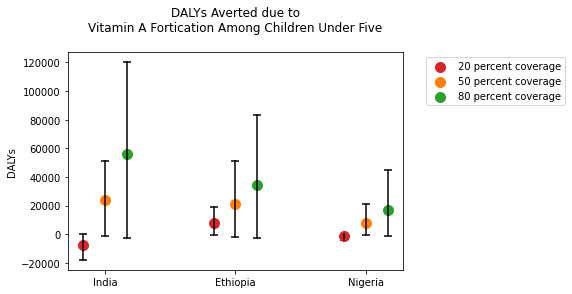

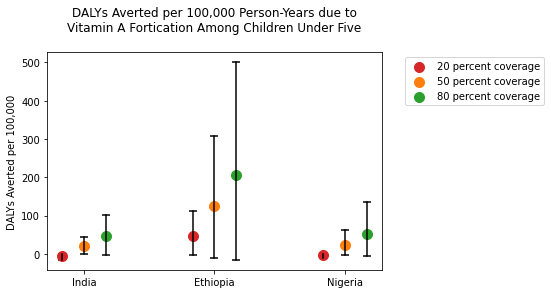

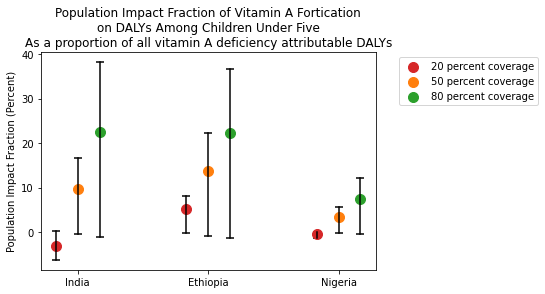

In [13]:
make_india_ethiopia_nigeria_plots(vitamin_a_daly_reduction_counts, 'Vitamin A', 'counts', coverage_levels, '')
make_india_ethiopia_nigeria_plots(vitamin_a_daly_reduction_rates, 'Vitamin A', 'rates', coverage_levels, '')
make_india_ethiopia_nigeria_plots(vitamin_a_overall_pifs, 'Vitamin A', 'pifs', coverage_levels, 'As a proportion of all vitamin A deficiency attributable DALYs')

# ZINC

In [14]:
# ZINC
rei_id = 97
nutrient = 'zinc'
vehicle = 'wheat flour'
effective_fractions = [0,0,0,1]

In [15]:
# define no fortification relative risk distribution
# vitamin a specific -- this should be replaced for other models

from numpy import log
from scipy.stats import norm, lognorm

# median and 0.975-quantile of lognormal distribution for RR
median = 0.47
q_975 = 0.69

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

mu = log(median) # mean of normal distribution for log(RR)
sigma = (log(q_975) - mu) / q_975_stdnorm # std dev of normal distribution for log(RR)

# Frozen lognormal distribution for RR, representing uncertainty in our effect size
# (s is the shape parameter)
rr_distribution = lognorm(s=sigma, scale=median)

In [16]:
zinc_baseline_coverage, zinc_counterfactual_coverage = generate_overall_coverage_rates(
                                                     'temporary_coverage_data_3_3_21.csv',
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                     ['under-5','total population',np.nan])

In [17]:
zinc_rr_deficiency_nofort = (1 / generate_rr_deficiency_nofort_draws(mu, sigma, location_ids))
zinc_rr_deficiency_nofort.mean(axis=1)

location_id
163    2.178029
179    2.178029
214    2.178029
dtype: float64

In [18]:
zinc_dalys = pull_deficiency_attributable_dalys(rei_id,
                                              location_ids,
                                              age_group_ids,
                                              sex_ids,
                                              index_cols)
zinc_dalys.head()

draw_0       draw_1       draw_10  \
location_id sex_id age_group_id                                            
163         1      5             16949.136066  5790.907117   7164.505392   
            2      5             17480.919921  8297.696257  12246.257864   
179         1      5              3448.995471     0.000000    614.253281   
            2      5              2510.325112     0.000000    725.944827   
214         1      5             15451.946600  1256.797150   8547.760523   

                                     draw_100     draw_101     draw_102  \
location_id sex_id age_group_id                                           
163         1      5             10037.163644  4544.152076  3212.868622   
            2      5             19603.059582  8975.319614  6112.236218   
179         1      5              2107.278291   319.706616   231.664226   
            2      5              3241.248600   422.819954   250.174031   
214         1      5             17062.305012  3304.418320  3378.351921   

                                    draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                            
163         1      5             5638.983711  19172.637650  12517.170514   
            2      5             7914.494521  22383.542155  22995.225388   
179         1      5              352.855071   2061.009818   3264.047462   
            2      5              368.314439   1807.598193   3854.940357   
214         1      5             4469.609722  20629.062760  22978.371339   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
163         1      5             14340.011960  ...  15876.397913   
            2      5             10836.023177  ...  20254.952241   
179         1      5               765.657777  ...   1363.149822   
            2      5               424.497768  ...   1165.865323   
214         1      5              9116.519663  ...  13519.557990   

                                     draw_991      draw_992      draw_993  \
location_id sex_id age_group_id                                             
163         1      5             20739.827751  13920.518362  14662.124164   
            2      5             20685.013922  12564.264817  14298.015574   
179         1      5              3302.960250    553.931751   1418.490976   
            2      5              2430.473869    315.796026    970.568275   
214         1      5             30940.527127   6466.099826  11948.657275   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
163         1      5             26629.654957  22032.790274  14306.073292   
            2      5             38877.039385  16602.180202  15995.499287   
179         1      5              4472.610161   3555.119067   1582.684473   
            2      5              2350.384095   2094.604407    896.673148   
214         1      5             38449.781854  34644.038887  13248.614853   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
163         1      5             13102.264170  10226.563640  10168.938426  
            2      5             13924.475543  11921.955400  12711.902860  
179         1      5               544.574265   1076.557756   1877.612290  
            2      5               471.888504    698.810115   1560.922746  
214         1      5              8414.232001  10916.522433  15432.631889  

[5 rows x 1000 columns]

In [19]:
zinc_baseline_effective_coverage = apply_age_related_effective_coverage_restrictions(
                                                                zinc_baseline_coverage,
                                                                sex_ids,
                                                                age_group_ids,
                                                                effective_fractions)
zinc_counterfactual_effective_coverage = apply_age_related_effective_coverage_restrictions(
                                                                zinc_counterfactual_coverage,
                                                                sex_ids,
                                                                age_group_ids,
                                                                effective_fractions)

In [20]:
zinc_paf_deficiency_nofort = calculate_paf_deficiency_nofort(
                                    zinc_rr_deficiency_nofort, 
                                    zinc_baseline_effective_coverage)
zinc_paf_deficiency_nofort.head()

draw_0    draw_1   draw_10  draw_100  \
location_id age_group_id sex_id year                                           
163         2            1      2021  0.345476  0.571001  0.584197  0.603221   
                                2022  0.345476  0.571001  0.584197  0.603221   
                                2023  0.345476  0.571001  0.584197  0.603221   
                                2024  0.345476  0.571001  0.584197  0.603221   
                                2025  0.345476  0.571001  0.584197  0.603221   

                                      draw_101  draw_102  draw_103  draw_104  \
location_id age_group_id sex_id year                                           
163         2            1      2021  0.494235   0.49253  0.645743  0.483019   
                                2022  0.494235   0.49253  0.645743  0.483019   
                                2023  0.494235   0.49253  0.645743  0.483019   
                                2024  0.494235   0.49253  0.645743  0.483019   
                                2025  0.494235   0.49253  0.645743  0.483019   

                                      draw_105  draw_106  ...  draw_990  \
location_id age_group_id sex_id year                      ...             
163         2            1      2021  0.579614  0.378442  ...  0.548122   
                                2022  0.579614  0.378442  ...  0.548122   
                                2023  0.579614  0.378442  ...  0.548122   
                                2024  0.579614  0.378442  ...  0.548122   
                                2025  0.579614  0.378442  ...  0.548122   

                                      draw_991  draw_992  draw_993  draw_994  \
location_id age_group_id sex_id year                                           
163         2            1      2021  0.568194  0.399642   0.34575  0.587321   
                                2022  0.568194  0.399642   0.34575  0.587321   
                                2023  0.568194  0.399642   0.34575  0.587321   
                                2024  0.568194  0.399642   0.34575  0.587321   
                                2025  0.568194  0.399642   0.34575  0.587321   

                                      draw_995  draw_996  draw_997  draw_998  \
location_id age_group_id sex_id year                                           
163         2            1      2021  0.526427  0.475794  0.572889  0.584449   
                                2022  0.526427  0.475794  0.572889  0.584449   
                                2023  0.526427  0.475794  0.572889  0.584449   
                                2024  0.526427  0.475794  0.572889  0.584449   
                                2025  0.526427  0.475794  0.572889  0.584449   

                                      draw_999  
location_id age_group_id sex_id year            
163         2            1      2021  0.588412  
                                2022  0.588412  
                                2023  0.588412  
                                2024  0.588412  
                                2025  0.588412  

[5 rows x 1000 columns]

In [21]:
zinc_pif_deficiency_nofort = calculate_pif_deficiency_nofort(
                                    zinc_paf_deficiency_nofort,
                                    zinc_baseline_effective_coverage,
                                    zinc_counterfactual_effective_coverage)
zinc_pif_deficiency_nofort.head()

draw_0  draw_1  draw_10  \
location_id age_group_id sex_id year coverage_level                            
163         2            1      2021 0.2                0.0     0.0      0.0   
                                     0.5                0.0     0.0      0.0   
                                     0.8                0.0     0.0      0.0   
                                2022 0.2                0.0     0.0      0.0   
                                     0.5                0.0     0.0      0.0   

                                                     draw_100  draw_101  \
location_id age_group_id sex_id year coverage_level                       
163         2            1      2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_102  draw_103  \
location_id age_group_id sex_id year coverage_level                       
163         2            1      2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_104  draw_105  \
location_id age_group_id sex_id year coverage_level                       
163         2            1      2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_106  ...  draw_990  \
location_id age_group_id sex_id year coverage_level            ...             
163         2            1      2021 0.2                  0.0  ...       0.0   
                                     0.5                  0.0  ...       0.0   
                                     0.8                  0.0  ...       0.0   
                                2022 0.2                  0.0  ...       0.0   
                                     0.5                  0.0  ...       0.0   

                                                     draw_991  draw_992  \
location_id age_group_id sex_id year coverage_level                       
163         2            1      2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_993  draw_994  \
location_id age_group_id sex_id year coverage_level                       
163         2            1      2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
                                     0.8                  0.0       0.0   
                                2022 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   

                                                     draw_995  draw_996  \
location_id age_group_id sex_id year coverage_level                       
163         2            1      2021 0.2                  0.0       0.0   
                                     0.5                  0.0       0.0   
 

In [22]:
zinc_overall_pifs, zinc_daly_reduction_counts = calculate_final_pifs_and_daly_reductions(
                                                    zinc_pif_deficiency_nofort,
                                                    zinc_dalys,
                                                    coverage_levels, years)

In [23]:
zinc_daly_reduction_rates = calculate_rates(zinc_daly_reduction_counts, 
                                            location_ids, 
                                            age_group_ids, 
                                            sex_ids)

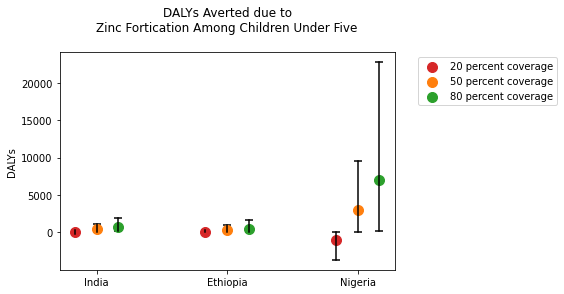

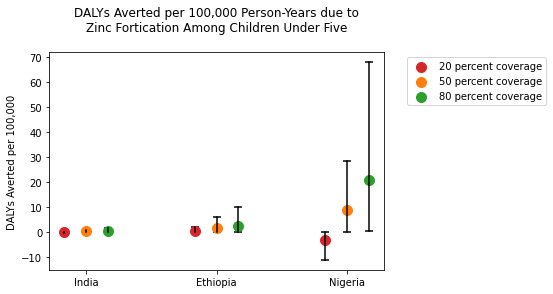

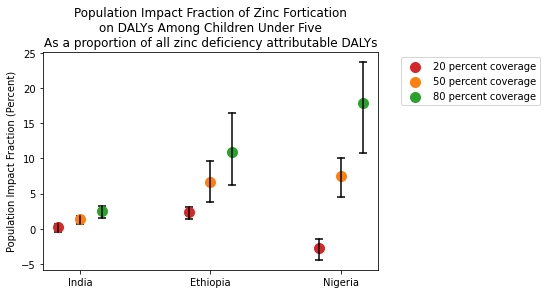

In [25]:
make_india_ethiopia_nigeria_plots(zinc_daly_reduction_counts, 'Zinc', 'counts', coverage_levels,"")
make_india_ethiopia_nigeria_plots(zinc_daly_reduction_rates, 'Zinc', 'rates', coverage_levels,"")
make_india_ethiopia_nigeria_plots(zinc_overall_pifs, 'Zinc', 'pifs', coverage_levels,"As a proportion of all zinc deficiency attributable DALYs")